In [75]:
#!pip install pandas numpy seaborn matplotlib klib dtale scikit-learn joblib pandas-profiling


In [3]:
!pip install pandas numpy seaborn matplotlib klib dtale scikit-learn joblib ydata-profiling

In [4]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
df_train= pd.read_csv(r'C:\Users\madha\Downloads\BigMart Prediction\train.csv')
df_test= pd.read_csv(r'C:\Users\madha\Downloads\BigMart Prediction\test.csv')

In [6]:
df_train.head()

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.000000   
4           NCD19         8.93          Low Fat         0.000000   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Medium               Tier 1   
3                       1998         NaN               Tier 3   
4                       1987        High               Tier 3   

         Outlet_Type  Item_Outlet_Sales  
0  Supermarket Type1          3735.1380  
1  Supermarket Type2           443.4228  
2  Supermarket Type1          2097.2700  
3      Grocery Store           732.3800  
4  Supermarket Type1           994.7052

In [7]:
#df_test

In [8]:
df_train.shape

(8523, 12)

In [9]:
df_train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [10]:
df_test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [11]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [12]:
df_train.describe()

Item_Weight  Item_Visibility     Item_MRP  Outlet_Establishment_Year  \
count  7060.000000      8523.000000  8523.000000                8523.000000   
mean     12.857645         0.066132   140.992782                1997.831867   
std       4.643456         0.051598    62.275067                   8.371760   
min       4.555000         0.000000    31.290000                1985.000000   
25%       8.773750         0.026989    93.826500                1987.000000   
50%      12.600000         0.053931   143.012800                1999.000000   
75%      16.850000         0.094585   185.643700                2004.000000   
max      21.350000         0.328391   266.888400                2009.000000   

       Item_Outlet_Sales  
count        8523.000000  
mean         2181.288914  
std          1706.499616  
min            33.290000  
25%           834.247400  
50%          1794.331000  
75%          3101.296400  
max         13086.964800

In [13]:
#Item_Weight is numerical column so we fill it with Mean Imputation

In [14]:
df_train['Item_Weight'].describe()

count    7060.000000
mean       12.857645
std         4.643456
min         4.555000
25%         8.773750
50%        12.600000
75%        16.850000
max        21.350000
Name: Item_Weight, dtype: float64

In [15]:
df_train['Item_Weight'].fillna(df_train['Item_Weight'].mean(),inplace=True)
df_test['Item_Weight'].fillna(df_test['Item_Weight'].mean(),inplace=True)

In [16]:
df_train.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [17]:
df_train['Item_Weight'].describe()

count    8523.000000
mean       12.857645
std         4.226124
min         4.555000
25%         9.310000
50%        12.857645
75%        16.000000
max        21.350000
Name: Item_Weight, dtype: float64

In [18]:
#Outlet_Size is categorical column so we fill it with Mode Imputation

In [19]:
df_train['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [20]:
df_train['Outlet_Size'].fillna(df_train['Outlet_Size'].mode()[0],inplace=True)
df_test['Outlet_Size'].fillna(df_test['Outlet_Size'].mode()[0],inplace=True)

In [21]:
df_train

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0              FDA15        9.300          Low Fat         0.016047   
1              DRC01        5.920          Regular         0.019278   
2              FDN15       17.500          Low Fat         0.016760   
3              FDX07       19.200          Regular         0.000000   
4              NCD19        8.930          Low Fat         0.000000   
...              ...          ...              ...              ...   
8518           FDF22        6.865          Low Fat         0.056783   
8519           FDS36        8.380          Regular         0.046982   
8520           NCJ29       10.600          Low Fat         0.035186   
8521           FDN46        7.210          Regular         0.145221   
8522           DRG01       14.800          Low Fat         0.044878   

                  Item_Type  Item_MRP Outlet_Identifier  \
0                     Dairy  249.8092            OUT049   
1               Soft Drinks   48.2692            OUT018   
2                      Meat  141.6180            OUT049   
3     Fruits and Vegetables  182.0950            OUT010   
4                 Household   53.8614            OUT013   
...                     ...       ...               ...   
8518            Snack Foods  214.5218            OUT013   
8519           Baking Goods  108.1570            OUT045   
8520     Health and Hygiene   85.1224            OUT035   
8521            Snack Foods  103.1332            OUT018   
8522            Soft Drinks   75.4670            OUT046   

      Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                          1999      Medium               Tier 1   
1                          2009      Medium               Tier 3   
2                          1999      Medium               Tier 1   
3                          1998      Medium               Tier 3   
4                          1987        High               Tier 3   
...                         ...         ...                  ...   
8518                       1987        High               Tier 3   
8519                       2002      Medium               Tier 2   
8520                       2004       Small               Tier 2   
8521                       2009      Medium               Tier 3   
8522                       1997       Small               Tier 1   

            Outlet_Type  Item_Outlet_Sales  
0     Supermarket Type1          3735.1380  
1     Supermarket Type2           443.4228  
2     Supermarket Type1          2097.2700  
3         Grocery Store           732.3800  
4     Supermarket Type1           994.7052  
...                 ...                ...  
8518  Supermarket Type1          2778.3834  
8519  Supermarket Type1           549.2850  
8520  Supermarket Type1          1193.1136  
8521  Supermarket Type2          1845.5976  
8522  Supermarket Type1           765.6700  

[8523 rows x 12 columns]

In [22]:
df_train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [23]:
df_test.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [24]:
#Selecting features based on general requirements

In [25]:
df_train.drop(['Item_Identifier','Outlet_Identifier'],axis=1,inplace=True)
df_test.drop(['Item_Identifier','Outlet_Identifier'],axis=1,inplace=True)

In [26]:
df_train

Item_Weight Item_Fat_Content  Item_Visibility              Item_Type  \
0           9.300          Low Fat         0.016047                  Dairy   
1           5.920          Regular         0.019278            Soft Drinks   
2          17.500          Low Fat         0.016760                   Meat   
3          19.200          Regular         0.000000  Fruits and Vegetables   
4           8.930          Low Fat         0.000000              Household   
...           ...              ...              ...                    ...   
8518        6.865          Low Fat         0.056783            Snack Foods   
8519        8.380          Regular         0.046982           Baking Goods   
8520       10.600          Low Fat         0.035186     Health and Hygiene   
8521        7.210          Regular         0.145221            Snack Foods   
8522       14.800          Low Fat         0.044878            Soft Drinks   

      Item_MRP  Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0     249.8092                       1999      Medium               Tier 1   
1      48.2692                       2009      Medium               Tier 3   
2     141.6180                       1999      Medium               Tier 1   
3     182.0950                       1998      Medium               Tier 3   
4      53.8614                       1987        High               Tier 3   
...        ...                        ...         ...                  ...   
8518  214.5218                       1987        High               Tier 3   
8519  108.1570                       2002      Medium               Tier 2   
8520   85.1224                       2004       Small               Tier 2   
8521  103.1332                       2009      Medium               Tier 3   
8522   75.4670                       1997       Small               Tier 1   

            Outlet_Type  Item_Outlet_Sales  
0     Supermarket Type1          3735.1380  
1     Supermarket Type2           443.4228  
2     Supermarket Type1          2097.2700  
3         Grocery Store           732.3800  
4     Supermarket Type1           994.7052  
...                 ...                ...  
8518  Supermarket Type1          2778.3834  
8519  Supermarket Type1           549.2850  
8520  Supermarket Type1          1193.1136  
8521  Supermarket Type2          1845.5976  
8522  Supermarket Type1           765.6700  

[8523 rows x 10 columns]

In [27]:
#EDA with dtale library

In [28]:
import dtale

In [29]:
dtale.show(df_train)

In [30]:
dtale.show(df_test)

In [31]:
#EDA using Pandas Profiling

In [32]:
from ydata_profiling import ProfileReport

2023-05-12 02:12:47,056 - INFO     - Pandas backend loaded 1.5.3
2023-05-12 02:12:47,082 - INFO     - Numpy backend loaded 1.23.5
2023-05-12 02:12:47,088 - INFO     - Pyspark backend NOT loaded
2023-05-12 02:12:47,088 - INFO     - Python backend loaded


In [33]:
profile = ProfileReport(df_train, title="Pandas Profiling Report")

In [34]:
Profile = ProfileReport(df_test, title="Pandas Profiling Report")

In [35]:
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [36]:
Profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

C:\Users\madha\AppData\Local\Temp\ipykernel_24900\909663478.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



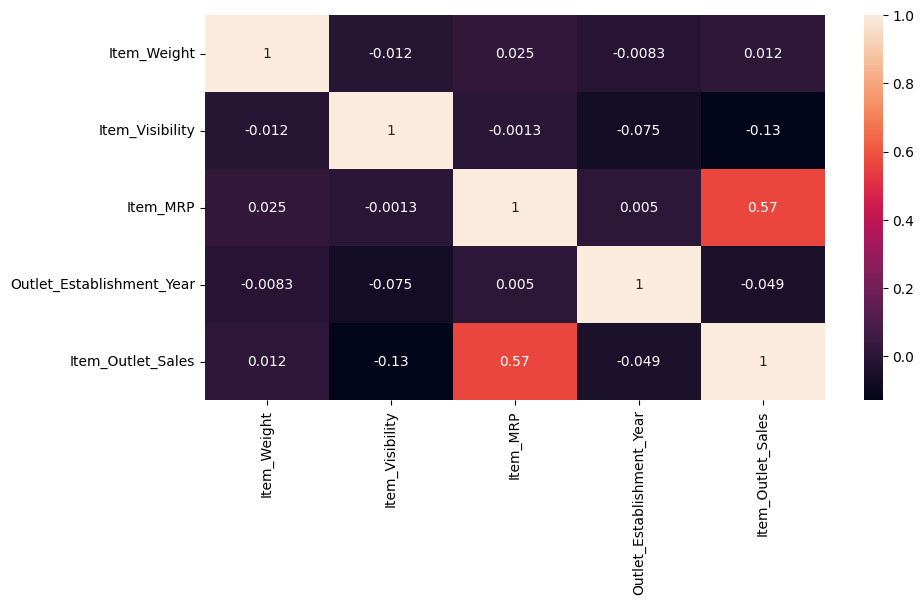

In [37]:
plt.figure(figsize=(10,5))
sns.heatmap(df_train.corr(),annot=True)
plt.show()

C:\Users\madha\AppData\Local\Temp\ipykernel_24900\1033362087.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



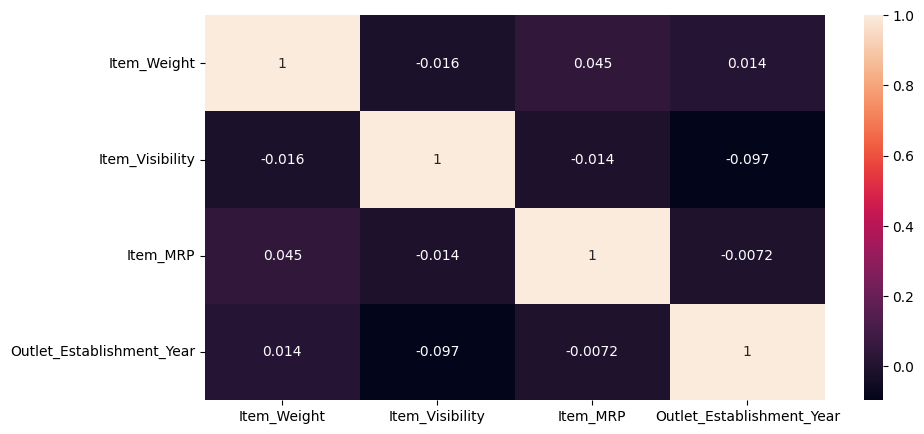

In [38]:
plt.figure(figsize=(10,5))
sns.heatmap(df_test.corr(),annot=True)
plt.show()

In [39]:
#EDA (Exploratory Data Analysis) using klib library

In [40]:
import klib

GridSpec(6, 5)

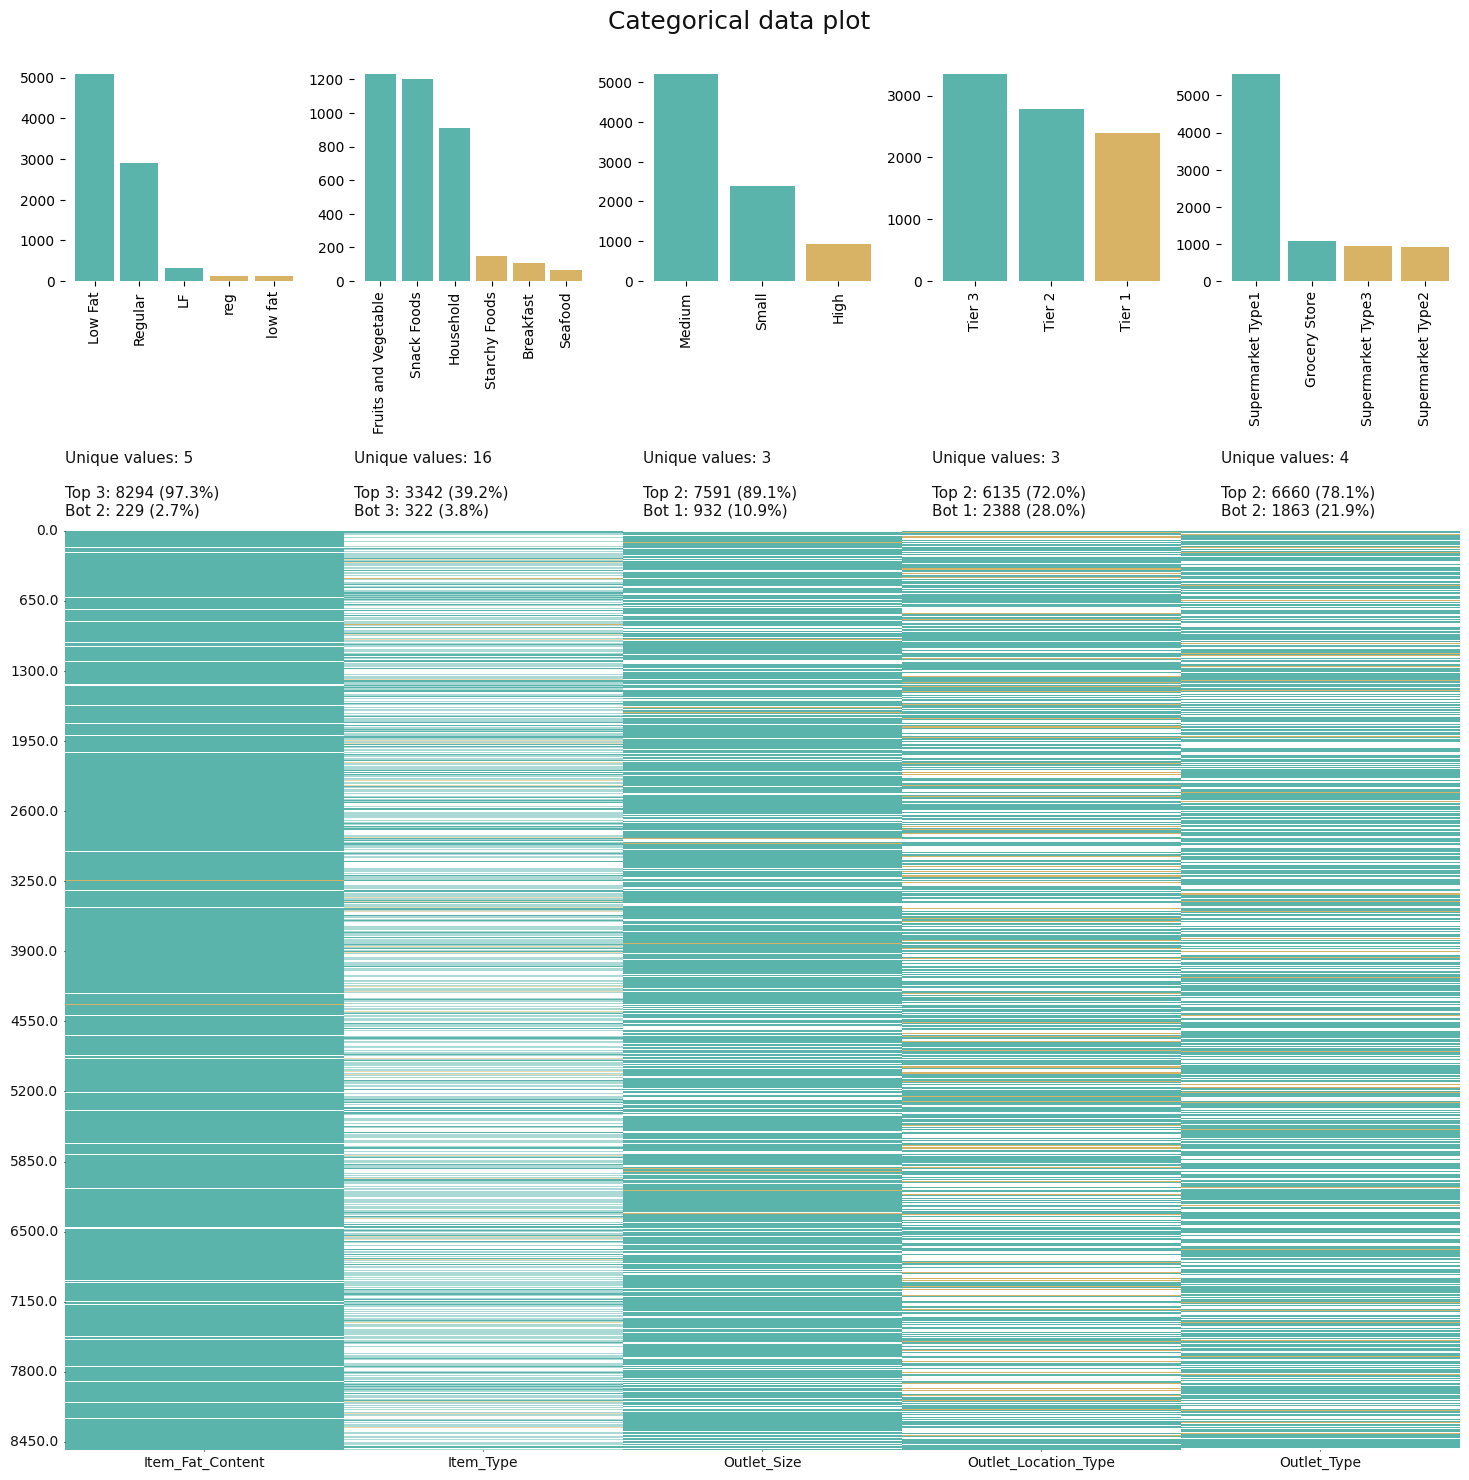

In [41]:
# klib.describe - functions for visualizing datasets
klib.cat_plot(df_train) # returns a visualization of the number and frequency of categorical features


GridSpec(6, 5)

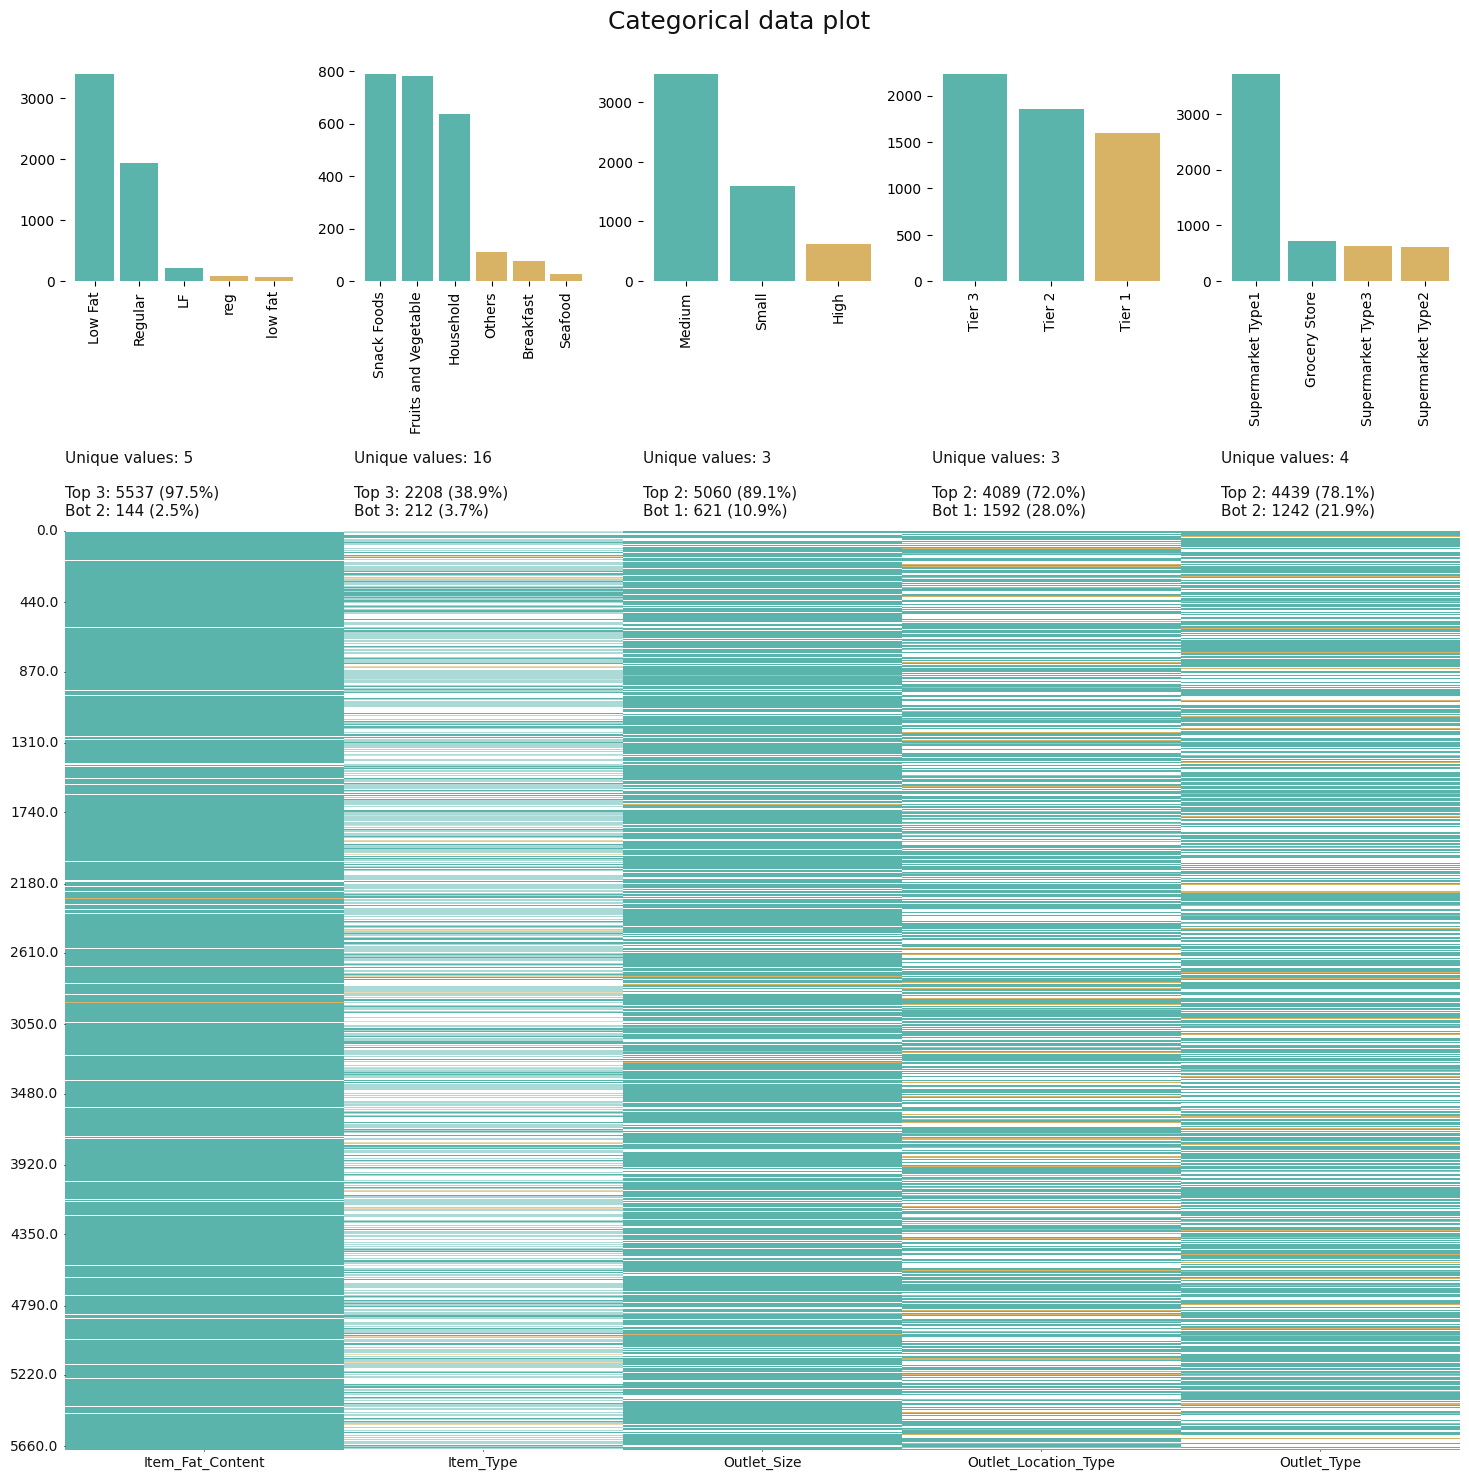

In [42]:
klib.cat_plot(df_test) # returns a visualization of the number and frequency of categorical features


In [43]:
klib.corr_mat(df_train) # returns a color-encoded correlation matrix

In [44]:
klib.corr_mat(df_test) # returns a color-encoded correlation matrix

<AxesSubplot: title={'center': 'Feature-correlation (pearson)'}>

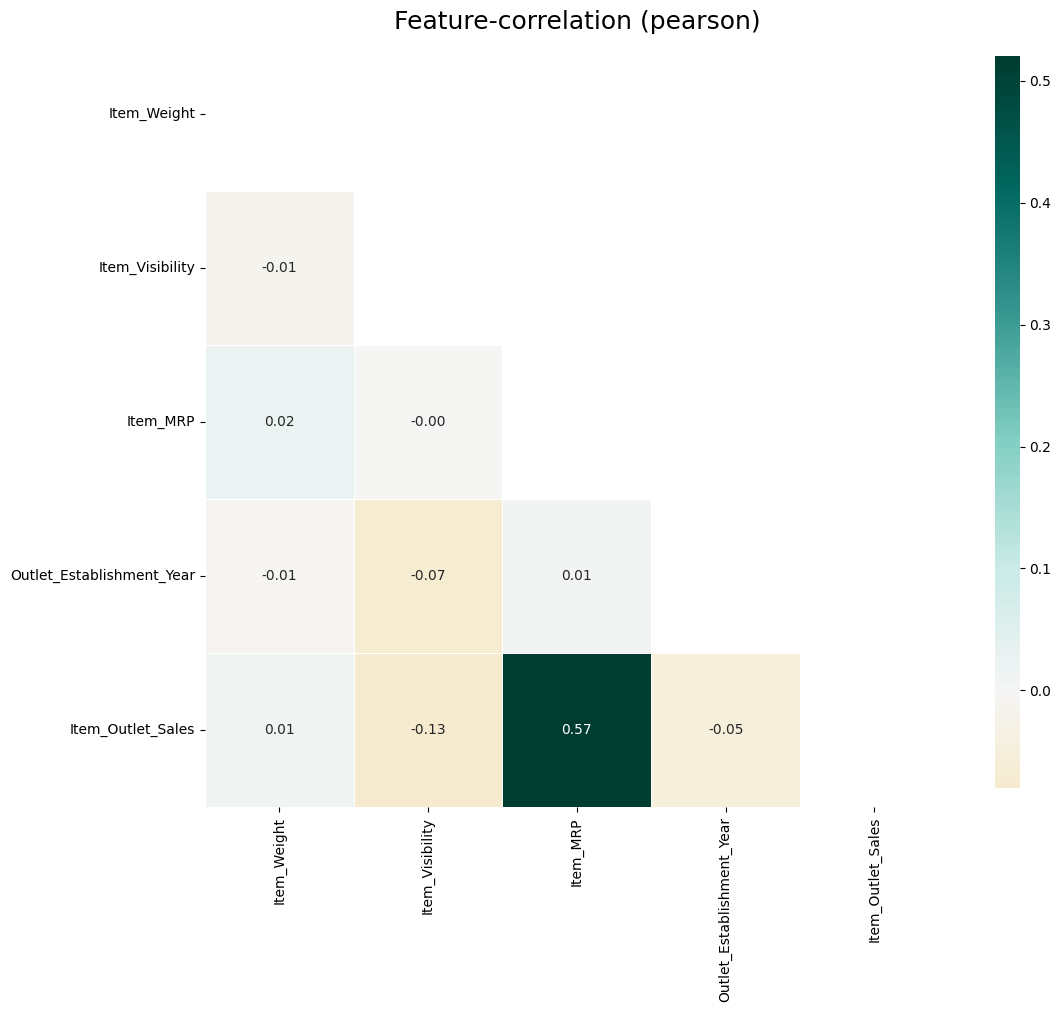

In [45]:
klib.corr_plot(df_train) # returns a color-encoded heatmap, ideal for correlations

<AxesSubplot: title={'center': 'Feature-correlation (pearson)'}>

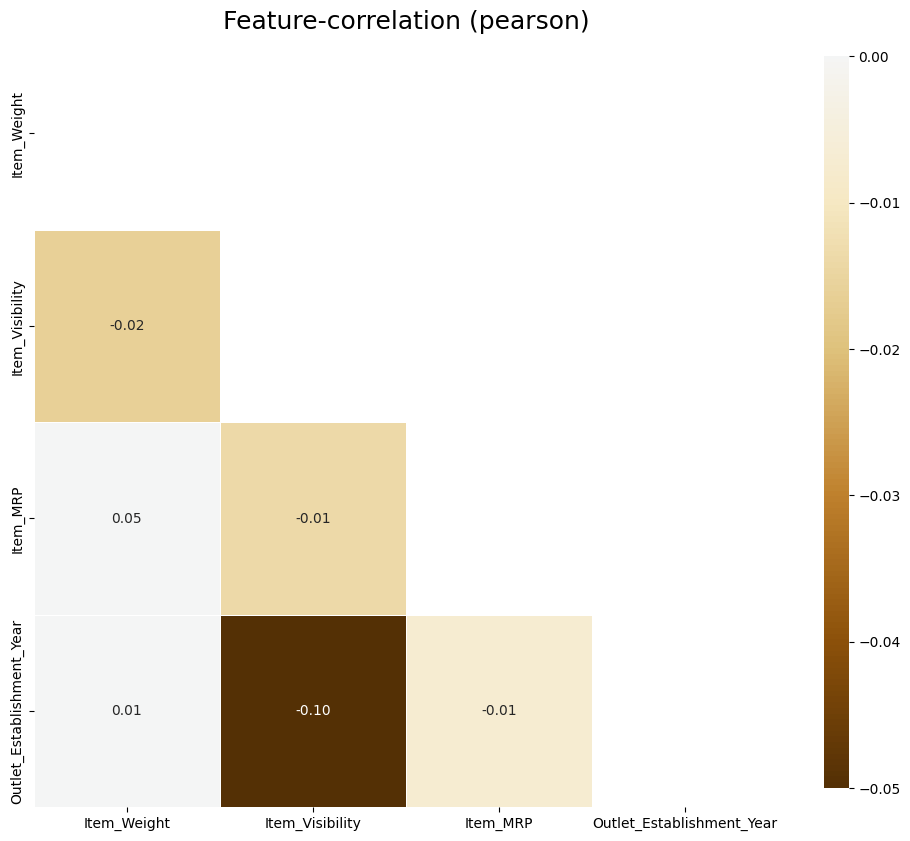

In [46]:
klib.corr_plot(df_test) # returns a color-encoded heatmap, ideal for correlations

<AxesSubplot: xlabel='Item_Outlet_Sales', ylabel='Density'>

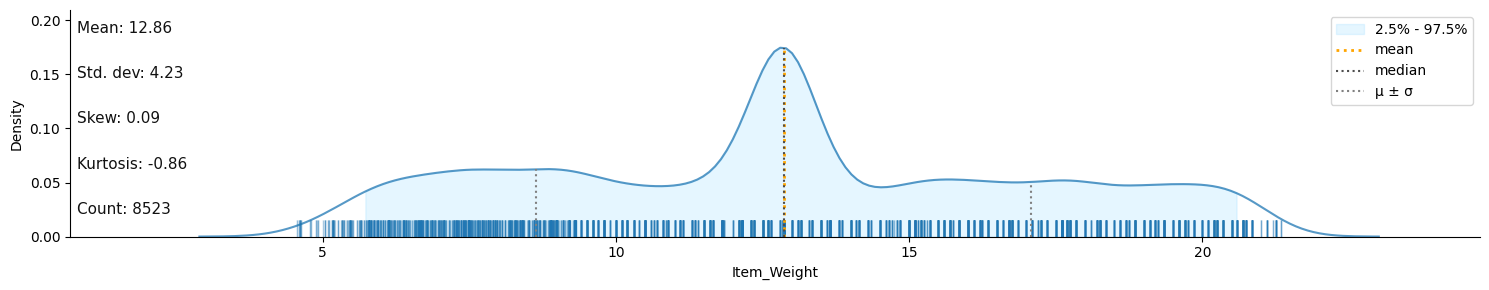

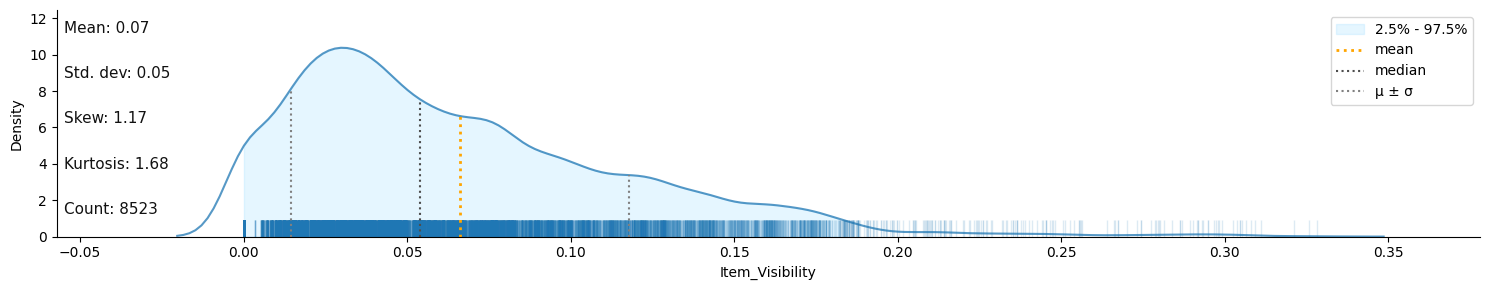

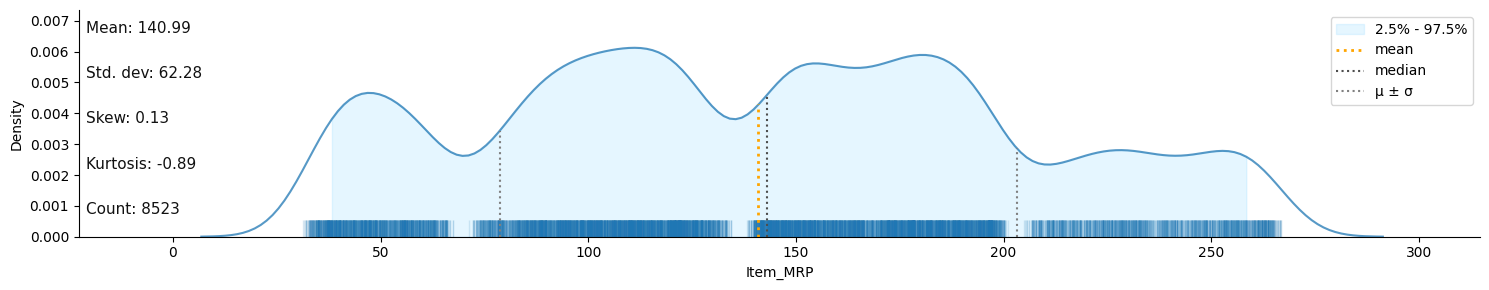

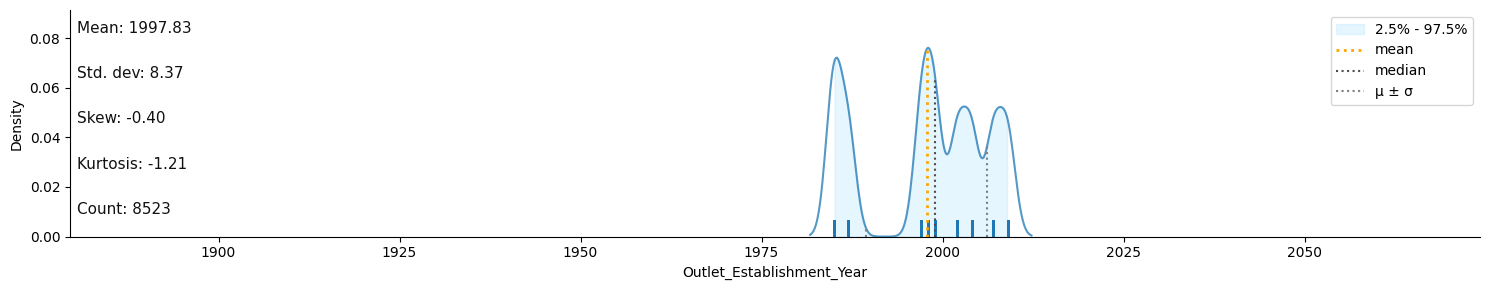

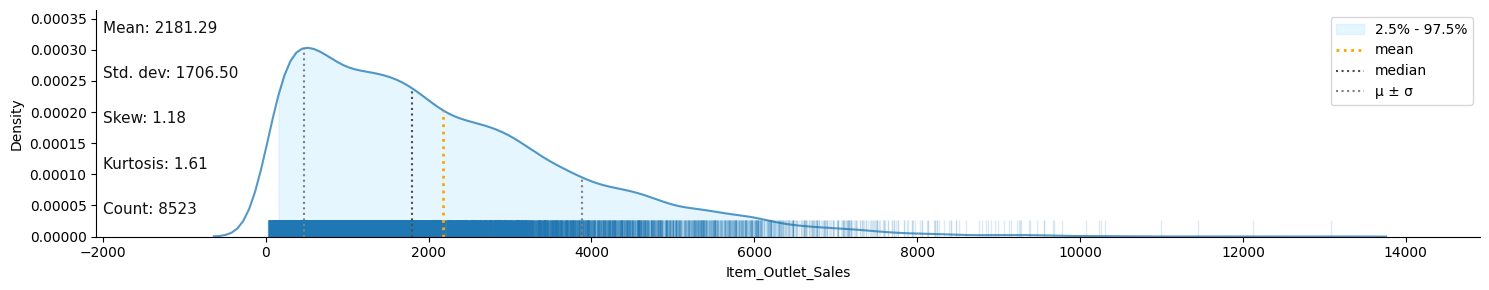

In [47]:
klib.dist_plot(df_train) # returns a distribution plot for every numeric feature

<AxesSubplot: xlabel='Outlet_Establishment_Year', ylabel='Density'>

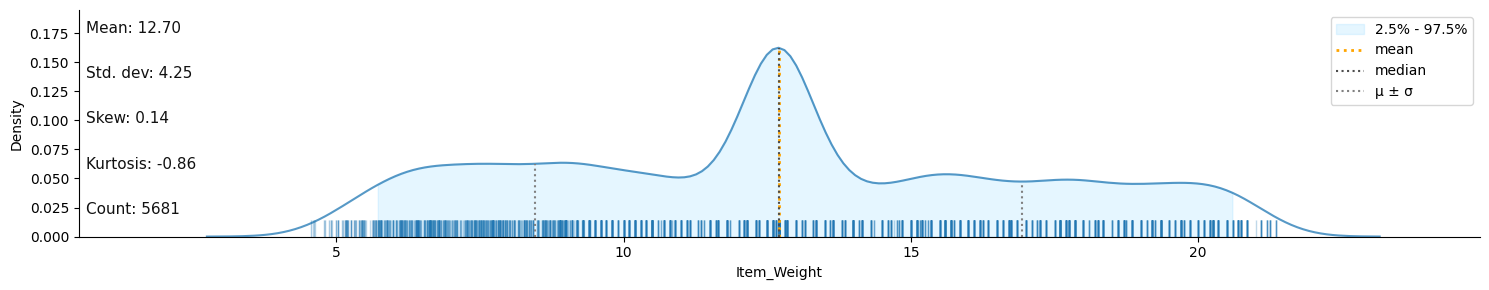

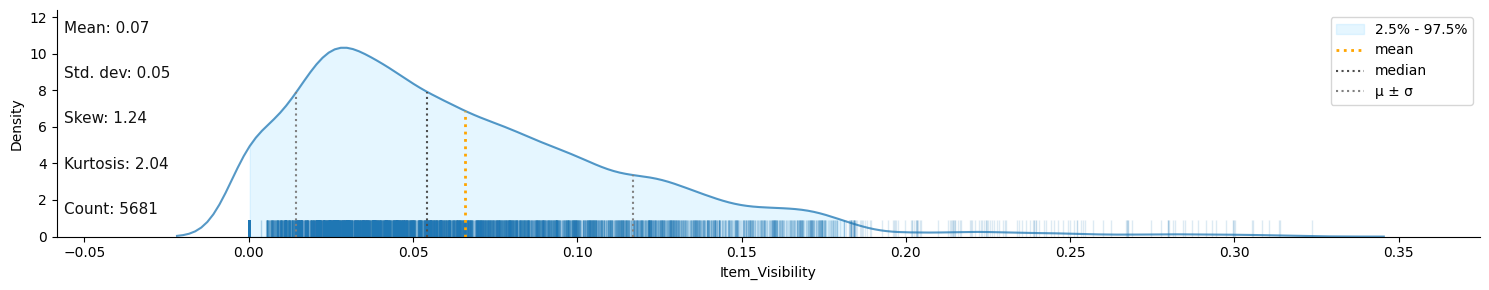

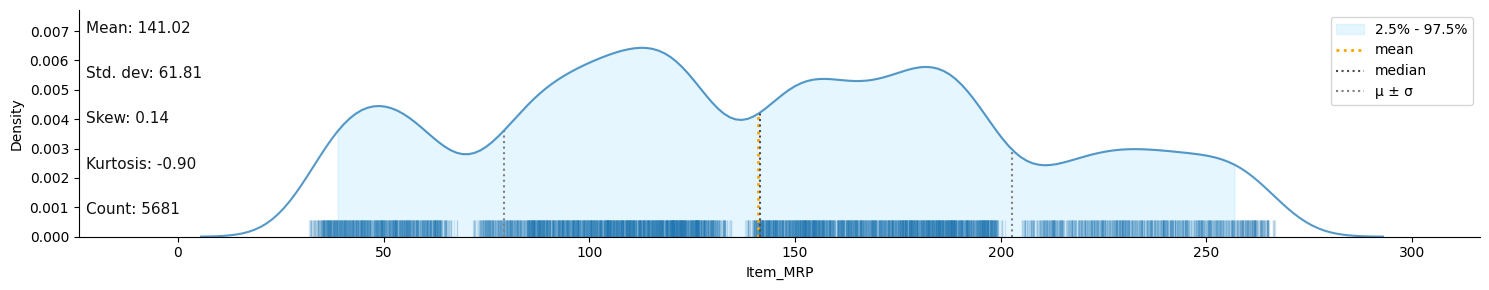

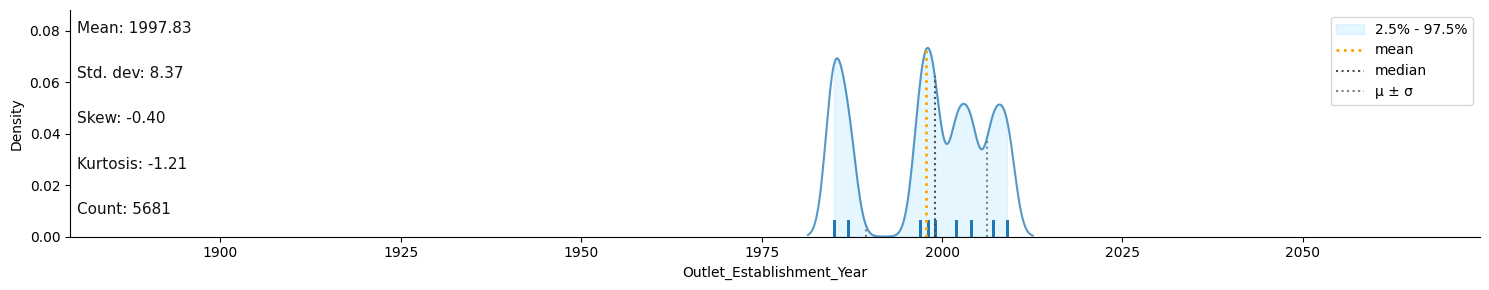

In [48]:
klib.dist_plot(df_test) # returns a distribution plot for every numeric feature

In [49]:
klib.missingval_plot(df_train) # returns a figure containing information about missing values

No missing values found in the dataset.


In [50]:
klib.missingval_plot(df_test) # returns a figure containing information about missing values

No missing values found in the dataset.


#Data Cleaning

In [51]:
# klib.clean - functions for cleaning datasets
# - klib.data_cleaning(df) # performs datacleaning (drop duplicates & empty rows/cols, adjust dtypes,...)
# - klib.clean_column_names(df) # cleans and standardizes column names, also called inside data_cleaning()
# - klib.convert_datatypes(df) # converts existing to more efficient dtypes, also called inside data_cleaning()
# - klib.drop_missing(df) # drops missing values, also called in data_cleaning()
# - klib.mv_col_handling(df) # drops features with high ratio of missing vals based on informational content
# - klib.pool_duplicate_subsets(df) # pools subset of cols based on duplicates with min. loss of information

In [52]:
#DataCleaning

In [53]:
klib.data_cleaning(df_train) # performs datacleaning (drop duplicates & empty rows/cols, adjust dtypes,...)

Shape of cleaned data: (8523, 10) - Remaining NAs: 0


Dropped rows: 0
     of which 0 duplicates. (Rows (first 150 shown): [])

Dropped columns: 0
     of which 0 single valued.     Columns: []
Dropped missing values: 0
Reduced memory by at least: 0.46 MB (-70.77%)



item_weight item_fat_content  item_visibility              item_type  \
0        9.300000          Low Fat         0.016047                  Dairy   
1        5.920000          Regular         0.019278            Soft Drinks   
2       17.500000          Low Fat         0.016760                   Meat   
3       19.200001          Regular         0.000000  Fruits and Vegetables   
4        8.930000          Low Fat         0.000000              Household   
...           ...              ...              ...                    ...   
8518     6.865000          Low Fat         0.056783            Snack Foods   
8519     8.380000          Regular         0.046982           Baking Goods   
8520    10.600000          Low Fat         0.035186     Health and Hygiene   
8521     7.210000          Regular         0.145221            Snack Foods   
8522    14.800000          Low Fat         0.044878            Soft Drinks   

        item_mrp  outlet_establishment_year outlet_size outlet_location_type  \
0     249.809204                       1999      Medium               Tier 1   
1      48.269199                       2009      Medium               Tier 3   
2     141.617996                       1999      Medium               Tier 1   
3     182.095001                       1998      Medium               Tier 3   
4      53.861401                       1987        High               Tier 3   
...          ...                        ...         ...                  ...   
8518  214.521805                       1987        High               Tier 3   
8519  108.156998                       2002      Medium               Tier 2   
8520   85.122398                       2004       Small               Tier 2   
8521  103.133202                       2009      Medium               Tier 3   
8522   75.467003                       1997       Small               Tier 1   

            outlet_type  item_outlet_sales  
0     Supermarket Type1        3735.137939  
1     Supermarket Type2         443.422791  
2     Supermarket Type1        2097.270020  
3         Grocery Store         732.380005  
4     Supermarket Type1         994.705200  
...                 ...                ...  
8518  Supermarket Type1        2778.383301  
8519  Supermarket Type1         549.284973  
8520  Supermarket Type1        1193.113647  
8521  Supermarket Type2        1845.597656  
8522  Supermarket Type1         765.669983  

[8523 rows x 10 columns]

In [54]:
klib.data_cleaning(df_test) # performs datacleaning (drop duplicates & empty rows/cols, adjust dtypes,...)

Shape of cleaned data: (5681, 9) - Remaining NAs: 0


Dropped rows: 0
     of which 0 duplicates. (Rows (first 150 shown): [])

Dropped columns: 0
     of which 0 single valued.     Columns: []
Dropped missing values: 0
Reduced memory by at least: 0.29 MB (-74.36%)



item_weight item_fat_content  item_visibility           item_type  \
0       20.750000          Low Fat         0.007565         Snack Foods   
1        8.300000              reg         0.038428               Dairy   
2       14.600000          Low Fat         0.099575              Others   
3        7.315000          Low Fat         0.015388         Snack Foods   
4       12.695633          Regular         0.118599               Dairy   
...           ...              ...              ...                 ...   
5676    10.500000          Regular         0.013496         Snack Foods   
5677     7.600000          Regular         0.142991       Starchy Foods   
5678    10.000000          Low Fat         0.073529  Health and Hygiene   
5679    15.300000          Regular         0.000000              Canned   
5680     9.500000          Regular         0.104720              Canned   

        item_mrp  outlet_establishment_year outlet_size outlet_location_type  \
0     107.862198                       1999      Medium               Tier 1   
1      87.319801                       2007      Medium               Tier 2   
2     241.753799                       1998      Medium               Tier 3   
3     155.033997                       2007      Medium               Tier 2   
4     234.229996                       1985      Medium               Tier 3   
...          ...                        ...         ...                  ...   
5676  141.315399                       1997       Small               Tier 1   
5677  169.144806                       2009      Medium               Tier 3   
5678  118.744003                       2002      Medium               Tier 2   
5679  214.621796                       2007      Medium               Tier 2   
5680   79.795998                       2002      Medium               Tier 2   

            outlet_type  
0     Supermarket Type1  
1     Supermarket Type1  
2         Grocery Store  
3     Supermarket Type1  
4     Supermarket Type3  
...                 ...  
5676  Supermarket Type1  
5677  Supermarket Type2  
5678  Supermarket Type1  
5679  Supermarket Type1  
5680  Supermarket Type1  

[5681 rows x 9 columns]

In [55]:
klib.clean_column_names(df_train) # cleans and standardizes column names, also called inside data_cleaning()


item_weight item_fat_content  item_visibility              item_type  \
0           9.300          Low Fat         0.016047                  Dairy   
1           5.920          Regular         0.019278            Soft Drinks   
2          17.500          Low Fat         0.016760                   Meat   
3          19.200          Regular         0.000000  Fruits and Vegetables   
4           8.930          Low Fat         0.000000              Household   
...           ...              ...              ...                    ...   
8518        6.865          Low Fat         0.056783            Snack Foods   
8519        8.380          Regular         0.046982           Baking Goods   
8520       10.600          Low Fat         0.035186     Health and Hygiene   
8521        7.210          Regular         0.145221            Snack Foods   
8522       14.800          Low Fat         0.044878            Soft Drinks   

      item_mrp  outlet_establishment_year outlet_size outlet_location_type  \
0     249.8092                       1999      Medium               Tier 1   
1      48.2692                       2009      Medium               Tier 3   
2     141.6180                       1999      Medium               Tier 1   
3     182.0950                       1998      Medium               Tier 3   
4      53.8614                       1987        High               Tier 3   
...        ...                        ...         ...                  ...   
8518  214.5218                       1987        High               Tier 3   
8519  108.1570                       2002      Medium               Tier 2   
8520   85.1224                       2004       Small               Tier 2   
8521  103.1332                       2009      Medium               Tier 3   
8522   75.4670                       1997       Small               Tier 1   

            outlet_type  item_outlet_sales  
0     Supermarket Type1          3735.1380  
1     Supermarket Type2           443.4228  
2     Supermarket Type1          2097.2700  
3         Grocery Store           732.3800  
4     Supermarket Type1           994.7052  
...                 ...                ...  
8518  Supermarket Type1          2778.3834  
8519  Supermarket Type1           549.2850  
8520  Supermarket Type1          1193.1136  
8521  Supermarket Type2          1845.5976  
8522  Supermarket Type1           765.6700  

[8523 rows x 10 columns]

In [56]:
klib.clean_column_names(df_test) # cleans and standardizes column names, also called inside data_cleaning()


item_weight item_fat_content  item_visibility           item_type  \
0       20.750000          Low Fat         0.007565         Snack Foods   
1        8.300000              reg         0.038428               Dairy   
2       14.600000          Low Fat         0.099575              Others   
3        7.315000          Low Fat         0.015388         Snack Foods   
4       12.695633          Regular         0.118599               Dairy   
...           ...              ...              ...                 ...   
5676    10.500000          Regular         0.013496         Snack Foods   
5677     7.600000          Regular         0.142991       Starchy Foods   
5678    10.000000          Low Fat         0.073529  Health and Hygiene   
5679    15.300000          Regular         0.000000              Canned   
5680     9.500000          Regular         0.104720              Canned   

      item_mrp  outlet_establishment_year outlet_size outlet_location_type  \
0     107.8622                       1999      Medium               Tier 1   
1      87.3198                       2007      Medium               Tier 2   
2     241.7538                       1998      Medium               Tier 3   
3     155.0340                       2007      Medium               Tier 2   
4     234.2300                       1985      Medium               Tier 3   
...        ...                        ...         ...                  ...   
5676  141.3154                       1997       Small               Tier 1   
5677  169.1448                       2009      Medium               Tier 3   
5678  118.7440                       2002      Medium               Tier 2   
5679  214.6218                       2007      Medium               Tier 2   
5680   79.7960                       2002      Medium               Tier 2   

            outlet_type  
0     Supermarket Type1  
1     Supermarket Type1  
2         Grocery Store  
3     Supermarket Type1  
4     Supermarket Type3  
...                 ...  
5676  Supermarket Type1  
5677  Supermarket Type2  
5678  Supermarket Type1  
5679  Supermarket Type1  
5680  Supermarket Type1  

[5681 rows x 9 columns]

In [57]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   item_weight                8523 non-null   float64
 1   item_fat_content           8523 non-null   object 
 2   item_visibility            8523 non-null   float64
 3   item_type                  8523 non-null   object 
 4   item_mrp                   8523 non-null   float64
 5   outlet_establishment_year  8523 non-null   int64  
 6   outlet_size                8523 non-null   object 
 7   outlet_location_type       8523 non-null   object 
 8   outlet_type                8523 non-null   object 
 9   item_outlet_sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(5)
memory usage: 666.0+ KB


In [58]:
klib.convert_datatypes(df_train) # converts existing to more efficient dtypes, also called inside data_cleaning()

item_weight item_fat_content  item_visibility              item_type  \
0        9.300000          Low Fat         0.016047                  Dairy   
1        5.920000          Regular         0.019278            Soft Drinks   
2       17.500000          Low Fat         0.016760                   Meat   
3       19.200001          Regular         0.000000  Fruits and Vegetables   
4        8.930000          Low Fat         0.000000              Household   
...           ...              ...              ...                    ...   
8518     6.865000          Low Fat         0.056783            Snack Foods   
8519     8.380000          Regular         0.046982           Baking Goods   
8520    10.600000          Low Fat         0.035186     Health and Hygiene   
8521     7.210000          Regular         0.145221            Snack Foods   
8522    14.800000          Low Fat         0.044878            Soft Drinks   

        item_mrp  outlet_establishment_year outlet_size outlet_location_type  \
0     249.809204                       1999      Medium               Tier 1   
1      48.269199                       2009      Medium               Tier 3   
2     141.617996                       1999      Medium               Tier 1   
3     182.095001                       1998      Medium               Tier 3   
4      53.861401                       1987        High               Tier 3   
...          ...                        ...         ...                  ...   
8518  214.521805                       1987        High               Tier 3   
8519  108.156998                       2002      Medium               Tier 2   
8520   85.122398                       2004       Small               Tier 2   
8521  103.133202                       2009      Medium               Tier 3   
8522   75.467003                       1997       Small               Tier 1   

            outlet_type  item_outlet_sales  
0     Supermarket Type1        3735.137939  
1     Supermarket Type2         443.422791  
2     Supermarket Type1        2097.270020  
3         Grocery Store         732.380005  
4     Supermarket Type1         994.705200  
...                 ...                ...  
8518  Supermarket Type1        2778.383301  
8519  Supermarket Type1         549.284973  
8520  Supermarket Type1        1193.113647  
8521  Supermarket Type2        1845.597656  
8522  Supermarket Type1         765.669983  

[8523 rows x 10 columns]

In [59]:
klib.convert_datatypes(df_test) # converts existing to more efficient dtypes, also called inside data_cleaning()

item_weight item_fat_content  item_visibility           item_type  \
0       20.750000          Low Fat         0.007565         Snack Foods   
1        8.300000              reg         0.038428               Dairy   
2       14.600000          Low Fat         0.099575              Others   
3        7.315000          Low Fat         0.015388         Snack Foods   
4       12.695633          Regular         0.118599               Dairy   
...           ...              ...              ...                 ...   
5676    10.500000          Regular         0.013496         Snack Foods   
5677     7.600000          Regular         0.142991       Starchy Foods   
5678    10.000000          Low Fat         0.073529  Health and Hygiene   
5679    15.300000          Regular         0.000000              Canned   
5680     9.500000          Regular         0.104720              Canned   

        item_mrp  outlet_establishment_year outlet_size outlet_location_type  \
0     107.862198                       1999      Medium               Tier 1   
1      87.319801                       2007      Medium               Tier 2   
2     241.753799                       1998      Medium               Tier 3   
3     155.033997                       2007      Medium               Tier 2   
4     234.229996                       1985      Medium               Tier 3   
...          ...                        ...         ...                  ...   
5676  141.315399                       1997       Small               Tier 1   
5677  169.144806                       2009      Medium               Tier 3   
5678  118.744003                       2002      Medium               Tier 2   
5679  214.621796                       2007      Medium               Tier 2   
5680   79.795998                       2002      Medium               Tier 2   

            outlet_type  
0     Supermarket Type1  
1     Supermarket Type1  
2         Grocery Store  
3     Supermarket Type1  
4     Supermarket Type3  
...                 ...  
5676  Supermarket Type1  
5677  Supermarket Type2  
5678  Supermarket Type1  
5679  Supermarket Type1  
5680  Supermarket Type1  

[5681 rows x 9 columns]

In [60]:
df_train=klib.convert_datatypes(df_train) # converts existing to more efficient dtypes, also called inside data_cleaning()
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   item_weight                8523 non-null   float32 
 1   item_fat_content           8523 non-null   category
 2   item_visibility            8523 non-null   float32 
 3   item_type                  8523 non-null   category
 4   item_mrp                   8523 non-null   float32 
 5   outlet_establishment_year  8523 non-null   int16   
 6   outlet_size                8523 non-null   category
 7   outlet_location_type       8523 non-null   category
 8   outlet_type                8523 non-null   category
 9   item_outlet_sales          8523 non-null   float32 
dtypes: category(5), float32(4), int16(1)
memory usage: 192.9 KB


In [61]:
df_test=klib.convert_datatypes(df_test) # converts existing to more efficient dtypes, also called inside data_cleaning()
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   item_weight                5681 non-null   float32 
 1   item_fat_content           5681 non-null   category
 2   item_visibility            5681 non-null   float32 
 3   item_type                  5681 non-null   category
 4   item_mrp                   5681 non-null   float32 
 5   outlet_establishment_year  5681 non-null   int16   
 6   outlet_size                5681 non-null   category
 7   outlet_location_type       5681 non-null   category
 8   outlet_type                5681 non-null   category
dtypes: category(5), float32(3), int16(1)
memory usage: 106.9 KB


In [62]:
klib.drop_missing(df_train) # drops missing values, also called in data_cleaning()


item_weight item_fat_content  item_visibility              item_type  \
0        9.300000          Low Fat         0.016047                  Dairy   
1        5.920000          Regular         0.019278            Soft Drinks   
2       17.500000          Low Fat         0.016760                   Meat   
3       19.200001          Regular         0.000000  Fruits and Vegetables   
4        8.930000          Low Fat         0.000000              Household   
...           ...              ...              ...                    ...   
8518     6.865000          Low Fat         0.056783            Snack Foods   
8519     8.380000          Regular         0.046982           Baking Goods   
8520    10.600000          Low Fat         0.035186     Health and Hygiene   
8521     7.210000          Regular         0.145221            Snack Foods   
8522    14.800000          Low Fat         0.044878            Soft Drinks   

        item_mrp  outlet_establishment_year outlet_size outlet_location_type  \
0     249.809204                       1999      Medium               Tier 1   
1      48.269199                       2009      Medium               Tier 3   
2     141.617996                       1999      Medium               Tier 1   
3     182.095001                       1998      Medium               Tier 3   
4      53.861401                       1987        High               Tier 3   
...          ...                        ...         ...                  ...   
8518  214.521805                       1987        High               Tier 3   
8519  108.156998                       2002      Medium               Tier 2   
8520   85.122398                       2004       Small               Tier 2   
8521  103.133202                       2009      Medium               Tier 3   
8522   75.467003                       1997       Small               Tier 1   

            outlet_type  item_outlet_sales  
0     Supermarket Type1        3735.137939  
1     Supermarket Type2         443.422791  
2     Supermarket Type1        2097.270020  
3         Grocery Store         732.380005  
4     Supermarket Type1         994.705200  
...                 ...                ...  
8518  Supermarket Type1        2778.383301  
8519  Supermarket Type1         549.284973  
8520  Supermarket Type1        1193.113647  
8521  Supermarket Type2        1845.597656  
8522  Supermarket Type1         765.669983  

[8523 rows x 10 columns]

In [63]:
klib.drop_missing(df_test) # drops missing values, also called in data_cleaning()


item_weight item_fat_content  item_visibility           item_type  \
0       20.750000          Low Fat         0.007565         Snack Foods   
1        8.300000              reg         0.038428               Dairy   
2       14.600000          Low Fat         0.099575              Others   
3        7.315000          Low Fat         0.015388         Snack Foods   
4       12.695633          Regular         0.118599               Dairy   
...           ...              ...              ...                 ...   
5676    10.500000          Regular         0.013496         Snack Foods   
5677     7.600000          Regular         0.142991       Starchy Foods   
5678    10.000000          Low Fat         0.073529  Health and Hygiene   
5679    15.300000          Regular         0.000000              Canned   
5680     9.500000          Regular         0.104720              Canned   

        item_mrp  outlet_establishment_year outlet_size outlet_location_type  \
0     107.862198                       1999      Medium               Tier 1   
1      87.319801                       2007      Medium               Tier 2   
2     241.753799                       1998      Medium               Tier 3   
3     155.033997                       2007      Medium               Tier 2   
4     234.229996                       1985      Medium               Tier 3   
...          ...                        ...         ...                  ...   
5676  141.315399                       1997       Small               Tier 1   
5677  169.144806                       2009      Medium               Tier 3   
5678  118.744003                       2002      Medium               Tier 2   
5679  214.621796                       2007      Medium               Tier 2   
5680   79.795998                       2002      Medium               Tier 2   

            outlet_type  
0     Supermarket Type1  
1     Supermarket Type1  
2         Grocery Store  
3     Supermarket Type1  
4     Supermarket Type3  
...                 ...  
5676  Supermarket Type1  
5677  Supermarket Type2  
5678  Supermarket Type1  
5679  Supermarket Type1  
5680  Supermarket Type1  

[5681 rows x 9 columns]

In [64]:
klib.mv_col_handling(df_train) # drops features with high ratio of missing vals based on informational content


item_weight item_fat_content  item_visibility              item_type  \
0        9.300000          Low Fat         0.016047                  Dairy   
1        5.920000          Regular         0.019278            Soft Drinks   
2       17.500000          Low Fat         0.016760                   Meat   
3       19.200001          Regular         0.000000  Fruits and Vegetables   
4        8.930000          Low Fat         0.000000              Household   
...           ...              ...              ...                    ...   
8518     6.865000          Low Fat         0.056783            Snack Foods   
8519     8.380000          Regular         0.046982           Baking Goods   
8520    10.600000          Low Fat         0.035186     Health and Hygiene   
8521     7.210000          Regular         0.145221            Snack Foods   
8522    14.800000          Low Fat         0.044878            Soft Drinks   

        item_mrp  outlet_establishment_year outlet_size outlet_location_type  \
0     249.809204                       1999      Medium               Tier 1   
1      48.269199                       2009      Medium               Tier 3   
2     141.617996                       1999      Medium               Tier 1   
3     182.095001                       1998      Medium               Tier 3   
4      53.861401                       1987        High               Tier 3   
...          ...                        ...         ...                  ...   
8518  214.521805                       1987        High               Tier 3   
8519  108.156998                       2002      Medium               Tier 2   
8520   85.122398                       2004       Small               Tier 2   
8521  103.133202                       2009      Medium               Tier 3   
8522   75.467003                       1997       Small               Tier 1   

            outlet_type  item_outlet_sales  
0     Supermarket Type1        3735.137939  
1     Supermarket Type2         443.422791  
2     Supermarket Type1        2097.270020  
3         Grocery Store         732.380005  
4     Supermarket Type1         994.705200  
...                 ...                ...  
8518  Supermarket Type1        2778.383301  
8519  Supermarket Type1         549.284973  
8520  Supermarket Type1        1193.113647  
8521  Supermarket Type2        1845.597656  
8522  Supermarket Type1         765.669983  

[8523 rows x 10 columns]

In [65]:
klib.mv_col_handling(df_test) # drops features with high ratio of missing vals based on informational content


item_weight item_fat_content  item_visibility           item_type  \
0       20.750000          Low Fat         0.007565         Snack Foods   
1        8.300000              reg         0.038428               Dairy   
2       14.600000          Low Fat         0.099575              Others   
3        7.315000          Low Fat         0.015388         Snack Foods   
4       12.695633          Regular         0.118599               Dairy   
...           ...              ...              ...                 ...   
5676    10.500000          Regular         0.013496         Snack Foods   
5677     7.600000          Regular         0.142991       Starchy Foods   
5678    10.000000          Low Fat         0.073529  Health and Hygiene   
5679    15.300000          Regular         0.000000              Canned   
5680     9.500000          Regular         0.104720              Canned   

        item_mrp  outlet_establishment_year outlet_size outlet_location_type  \
0     107.862198                       1999      Medium               Tier 1   
1      87.319801                       2007      Medium               Tier 2   
2     241.753799                       1998      Medium               Tier 3   
3     155.033997                       2007      Medium               Tier 2   
4     234.229996                       1985      Medium               Tier 3   
...          ...                        ...         ...                  ...   
5676  141.315399                       1997       Small               Tier 1   
5677  169.144806                       2009      Medium               Tier 3   
5678  118.744003                       2002      Medium               Tier 2   
5679  214.621796                       2007      Medium               Tier 2   
5680   79.795998                       2002      Medium               Tier 2   

            outlet_type  
0     Supermarket Type1  
1     Supermarket Type1  
2         Grocery Store  
3     Supermarket Type1  
4     Supermarket Type3  
...                 ...  
5676  Supermarket Type1  
5677  Supermarket Type2  
5678  Supermarket Type1  
5679  Supermarket Type1  
5680  Supermarket Type1  

[5681 rows x 9 columns]

In [66]:
klib.pool_duplicate_subsets(df_train) # pools subset of cols based on duplicates with min. loss of information

item_visibility    item_mrp  item_outlet_sales  pooled_vars
0            0.016047  249.809204        3735.137939            0
1            0.019278   48.269199         443.422791            1
2            0.016760  141.617996        2097.270020            2
3            0.000000  182.095001         732.380005            3
4            0.000000   53.861401         994.705200            4
...               ...         ...                ...          ...
8518         0.056783  214.521805        2778.383301         8518
8519         0.046982  108.156998         549.284973         8519
8520         0.035186   85.122398        1193.113647         8520
8521         0.145221  103.133202        1845.597656         8521
8522         0.044878   75.467003         765.669983         8522

[8523 rows x 4 columns]

In [67]:
klib.pool_duplicate_subsets(df_test) # pools subset of cols based on duplicates with min. loss of information

item_visibility    item_mrp  pooled_vars
0            0.007565  107.862198            0
1            0.038428   87.319801            1
2            0.099575  241.753799            2
3            0.015388  155.033997            3
4            0.118599  234.229996            4
...               ...         ...          ...
5676         0.013496  141.315399         2436
5677         0.142991  169.144806         5677
5678         0.073529  118.744003         5678
5679         0.000000  214.621796         5679
5680         0.104720   79.795998         5680

[5681 rows x 3 columns]

In [68]:
df_train

item_weight item_fat_content  item_visibility              item_type  \
0        9.300000          Low Fat         0.016047                  Dairy   
1        5.920000          Regular         0.019278            Soft Drinks   
2       17.500000          Low Fat         0.016760                   Meat   
3       19.200001          Regular         0.000000  Fruits and Vegetables   
4        8.930000          Low Fat         0.000000              Household   
...           ...              ...              ...                    ...   
8518     6.865000          Low Fat         0.056783            Snack Foods   
8519     8.380000          Regular         0.046982           Baking Goods   
8520    10.600000          Low Fat         0.035186     Health and Hygiene   
8521     7.210000          Regular         0.145221            Snack Foods   
8522    14.800000          Low Fat         0.044878            Soft Drinks   

        item_mrp  outlet_establishment_year outlet_size outlet_location_type  \
0     249.809204                       1999      Medium               Tier 1   
1      48.269199                       2009      Medium               Tier 3   
2     141.617996                       1999      Medium               Tier 1   
3     182.095001                       1998      Medium               Tier 3   
4      53.861401                       1987        High               Tier 3   
...          ...                        ...         ...                  ...   
8518  214.521805                       1987        High               Tier 3   
8519  108.156998                       2002      Medium               Tier 2   
8520   85.122398                       2004       Small               Tier 2   
8521  103.133202                       2009      Medium               Tier 3   
8522   75.467003                       1997       Small               Tier 1   

            outlet_type  item_outlet_sales  
0     Supermarket Type1        3735.137939  
1     Supermarket Type2         443.422791  
2     Supermarket Type1        2097.270020  
3         Grocery Store         732.380005  
4     Supermarket Type1         994.705200  
...                 ...                ...  
8518  Supermarket Type1        2778.383301  
8519  Supermarket Type1         549.284973  
8520  Supermarket Type1        1193.113647  
8521  Supermarket Type2        1845.597656  
8522  Supermarket Type1         765.669983  

[8523 rows x 10 columns]

In [69]:
df_test

item_weight item_fat_content  item_visibility           item_type  \
0       20.750000          Low Fat         0.007565         Snack Foods   
1        8.300000              reg         0.038428               Dairy   
2       14.600000          Low Fat         0.099575              Others   
3        7.315000          Low Fat         0.015388         Snack Foods   
4       12.695633          Regular         0.118599               Dairy   
...           ...              ...              ...                 ...   
5676    10.500000          Regular         0.013496         Snack Foods   
5677     7.600000          Regular         0.142991       Starchy Foods   
5678    10.000000          Low Fat         0.073529  Health and Hygiene   
5679    15.300000          Regular         0.000000              Canned   
5680     9.500000          Regular         0.104720              Canned   

        item_mrp  outlet_establishment_year outlet_size outlet_location_type  \
0     107.862198                       1999      Medium               Tier 1   
1      87.319801                       2007      Medium               Tier 2   
2     241.753799                       1998      Medium               Tier 3   
3     155.033997                       2007      Medium               Tier 2   
4     234.229996                       1985      Medium               Tier 3   
...          ...                        ...         ...                  ...   
5676  141.315399                       1997       Small               Tier 1   
5677  169.144806                       2009      Medium               Tier 3   
5678  118.744003                       2002      Medium               Tier 2   
5679  214.621796                       2007      Medium               Tier 2   
5680   79.795998                       2002      Medium               Tier 2   

            outlet_type  
0     Supermarket Type1  
1     Supermarket Type1  
2         Grocery Store  
3     Supermarket Type1  
4     Supermarket Type3  
...                 ...  
5676  Supermarket Type1  
5677  Supermarket Type2  
5678  Supermarket Type1  
5679  Supermarket Type1  
5680  Supermarket Type1  

[5681 rows x 9 columns]

In [70]:
#Preprocessing task before Model Building

In [71]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [72]:
df_train['item_fat_content']= le.fit_transform(df_train['item_fat_content'])
df_train['item_type']= le.fit_transform(df_train['item_type'])
df_train['outlet_size']= le.fit_transform(df_train['outlet_size'])
df_train['outlet_location_type']= le.fit_transform(df_train['outlet_location_type'])
df_train['outlet_type']= le.fit_transform(df_train['outlet_type'])

In [73]:
df_train

item_weight  item_fat_content  item_visibility  item_type    item_mrp  \
0        9.300000                 1         0.016047          4  249.809204   
1        5.920000                 2         0.019278         14   48.269199   
2       17.500000                 1         0.016760         10  141.617996   
3       19.200001                 2         0.000000          6  182.095001   
4        8.930000                 1         0.000000          9   53.861401   
...           ...               ...              ...        ...         ...   
8518     6.865000                 1         0.056783         13  214.521805   
8519     8.380000                 2         0.046982          0  108.156998   
8520    10.600000                 1         0.035186          8   85.122398   
8521     7.210000                 2         0.145221         13  103.133202   
8522    14.800000                 1         0.044878         14   75.467003   

      outlet_establishment_year  outlet_size  outlet_location_type  \
0                          1999            1                     0   
1                          2009            1                     2   
2                          1999            1                     0   
3                          1998            1                     2   
4                          1987            0                     2   
...                         ...          ...                   ...   
8518                       1987            0                     2   
8519                       2002            1                     1   
8520                       2004            2                     1   
8521                       2009            1                     2   
8522                       1997            2                     0   

      outlet_type  item_outlet_sales  
0               1        3735.137939  
1               2         443.422791  
2               1        2097.270020  
3               0         732.380005  
4               1         994.705200  
...           ...                ...  
8518            1        2778.383301  
8519            1         549.284973  
8520            1        1193.113647  
8521            2        1845.597656  
8522            1         765.669983  

[8523 rows x 10 columns]

In [74]:
df_train.head()

item_weight  item_fat_content  item_visibility  item_type    item_mrp  \
0     9.300000                 1         0.016047          4  249.809204   
1     5.920000                 2         0.019278         14   48.269199   
2    17.500000                 1         0.016760         10  141.617996   
3    19.200001                 2         0.000000          6  182.095001   
4     8.930000                 1         0.000000          9   53.861401   

   outlet_establishment_year  outlet_size  outlet_location_type  outlet_type  \
0                       1999            1                     0            1   
1                       2009            1                     2            2   
2                       1999            1                     0            1   
3                       1998            1                     2            0   
4                       1987            0                     2            1   

   item_outlet_sales  
0        3735.137939  
1         443.422791  
2        2097.270020  
3         732.380005  
4         994.705200

In [75]:
df_test['item_fat_content']=le.fit_transform(df_test['item_fat_content'])
df_test['item_type']=le.fit_transform(df_test['item_type'])
df_test['outlet_size']=le.fit_transform(df_test['outlet_size'])
df_test['outlet_location_type']=le.fit_transform(df_test['outlet_location_type'])
df_test['outlet_type']=le.fit_transform(df_test['outlet_type'])

In [76]:
df_test.head()

item_weight  item_fat_content  item_visibility  item_type    item_mrp  \
0    20.750000                 1         0.007565         13  107.862198   
1     8.300000                 4         0.038428          4   87.319801   
2    14.600000                 1         0.099575         11  241.753799   
3     7.315000                 1         0.015388         13  155.033997   
4    12.695633                 2         0.118599          4  234.229996   

   outlet_establishment_year  outlet_size  outlet_location_type  outlet_type  
0                       1999            1                     0            1  
1                       2007            1                     1            1  
2                       1998            1                     2            0  
3                       2007            1                     1            1  
4                       1985            1                     2            3

In [77]:
#Splitting our data into train and test

In [78]:
X=df_train.drop('item_outlet_sales',axis=1)

In [79]:
X

item_weight  item_fat_content  item_visibility  item_type    item_mrp  \
0        9.300000                 1         0.016047          4  249.809204   
1        5.920000                 2         0.019278         14   48.269199   
2       17.500000                 1         0.016760         10  141.617996   
3       19.200001                 2         0.000000          6  182.095001   
4        8.930000                 1         0.000000          9   53.861401   
...           ...               ...              ...        ...         ...   
8518     6.865000                 1         0.056783         13  214.521805   
8519     8.380000                 2         0.046982          0  108.156998   
8520    10.600000                 1         0.035186          8   85.122398   
8521     7.210000                 2         0.145221         13  103.133202   
8522    14.800000                 1         0.044878         14   75.467003   

      outlet_establishment_year  outlet_size  outlet_location_type  \
0                          1999            1                     0   
1                          2009            1                     2   
2                          1999            1                     0   
3                          1998            1                     2   
4                          1987            0                     2   
...                         ...          ...                   ...   
8518                       1987            0                     2   
8519                       2002            1                     1   
8520                       2004            2                     1   
8521                       2009            1                     2   
8522                       1997            2                     0   

      outlet_type  
0               1  
1               2  
2               1  
3               0  
4               1  
...           ...  
8518            1  
8519            1  
8520            1  
8521            2  
8522            1  

[8523 rows x 9 columns]

In [80]:
Y=df_train['item_outlet_sales']

In [81]:
Y

0       3735.137939
1        443.422791
2       2097.270020
3        732.380005
4        994.705200
           ...     
8518    2778.383301
8519     549.284973
8520    1193.113647
8521    1845.597656
8522     765.669983
Name: item_outlet_sales, Length: 8523, dtype: float32

In [82]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,random_state=101,test_size=0.2)

In [83]:
X_train

item_weight  item_fat_content  item_visibility  item_type    item_mrp  \
3684    19.250000                 1         0.101689          4   54.695599   
1935     7.630000                 1         0.061410         14   94.643600   
5142    19.350000                 2         0.065891         10  167.081604   
4978     6.380000                 0         0.031898          4  177.434402   
2299    16.700001                 1         0.022110          4  110.888603   
...           ...               ...              ...        ...         ...   
599      5.000000                 1         0.044005         14  188.852997   
5695    14.650000                 1         0.170664          7   56.461399   
8006    12.500000                 1         0.018849          8   96.738403   
1361     9.695000                 2         0.129009          0  226.940399   
1547    15.700000                 1         0.161317          9   57.556198   

      outlet_establishment_year  outlet_size  outlet_location_type  \
3684                       1987            0                     2   
1935                       2007            1                     1   
5142                       2007            1                     1   
4978                       1997            2                     0   
2299                       2002            1                     1   
...                         ...          ...                   ...   
599                        1997            2                     0   
5695                       2002            1                     1   
8006                       1997            2                     0   
1361                       2007            1                     1   
1547                       2009            1                     2   

      outlet_type  
3684            1  
1935            1  
5142            1  
4978            1  
2299            1  
...           ...  
599             1  
5695            1  
8006            1  
1361            1  
1547            2  

[6818 rows x 9 columns]

In [84]:
Y_train

3684     163.786804
1935    1607.241211
5142    1510.034424
4978    1784.343994
2299    3558.035156
           ...     
599     5502.836914
5695    1436.796387
8006    2167.844727
1361    2700.484863
1547     829.586792
Name: item_outlet_sales, Length: 6818, dtype: float32

In [85]:
X_test

item_weight  item_fat_content  item_visibility  item_type    item_mrp  \
8179    11.000000                 1         0.055163          8  100.335800   
8355    18.000000                 1         0.038979         13  148.641800   
3411     7.720000                 2         0.074731          1   77.598602   
7089    20.700001                 1         0.049035          6   39.950600   
6954     7.550000                 1         0.027225          3  152.934006   
...           ...               ...              ...        ...         ...   
1317    16.750000                 1         0.105019         13  155.263000   
4996     8.520000                 1         0.027059         14  153.368195   
531     15.600000                 1         0.111686         11  184.792404   
3891    17.100000                 1         0.000000          9  114.685997   
6629     6.260000                 2         0.009888         10  150.736603   

      outlet_establishment_year  outlet_size  outlet_location_type  \
8179                       2009            1                     2   
8355                       1987            0                     2   
3411                       1997            2                     0   
7089                       2007            1                     1   
6954                       2002            1                     1   
...                         ...          ...                   ...   
1317                       1999            1                     0   
4996                       1997            2                     0   
531                        1998            1                     2   
3891                       2009            1                     2   
6629                       2002            1                     1   

      outlet_type  
8179            2  
8355            1  
3411            1  
7089            1  
6954            1  
...           ...  
1317            1  
4996            1  
531             0  
3891            2  
6629            1  

[1705 rows x 9 columns]

In [86]:
Y_test

8179     904.822205
8355    2795.694092
3411    1947.464966
7089     872.863770
6954    2450.144043
           ...     
1317    1721.093018
4996     914.809204
531      370.184814
3891    1358.232056
6629    2418.185547
Name: item_outlet_sales, Length: 1705, dtype: float32

In [87]:
#Normalization / Standardisation

In [88]:
X.describe()

item_weight  item_fat_content  item_visibility    item_type  \
count  8523.000000       8523.000000      8523.000000  8523.000000   
mean     12.857646          1.369354         0.066132     7.226681   
std       4.226124          0.644810         0.051598     4.209990   
min       4.555000          0.000000         0.000000     0.000000   
25%       9.310000          1.000000         0.026989     4.000000   
50%      12.857645          1.000000         0.053931     6.000000   
75%      16.000000          2.000000         0.094585    10.000000   
max      21.350000          4.000000         0.328391    15.000000   

          item_mrp  outlet_establishment_year  outlet_size  \
count  8523.000000                8523.000000  8523.000000   
mean    140.992767                1997.831867     1.170832   
std      62.275066                   8.371760     0.600327   
min      31.290001                1985.000000     0.000000   
25%      93.826500                1987.000000     1.000000   
50%     143.012802                1999.000000     1.000000   
75%     185.643700                2004.000000     2.000000   
max     266.888397                2009.000000     2.000000   

       outlet_location_type  outlet_type  
count           8523.000000  8523.000000  
mean               1.112871     1.201220  
std                0.812757     0.796459  
min                0.000000     0.000000  
25%                0.000000     1.000000  
50%                1.000000     1.000000  
75%                2.000000     1.000000  
max                2.000000     3.000000

In [89]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [90]:
X_train_std= sc.fit_transform(X_train)

In [91]:
X_test_std= sc.fit_transform(X_test)

In [92]:
X_train_std

array([[ 1.52290023, -0.57382672,  0.68469731, ..., -1.95699503,
         1.08786619, -0.25964107],
       [-1.239856  , -0.57382672, -0.09514746, ..., -0.28872895,
        -0.13870429, -0.25964107],
       [ 1.54667619,  0.97378032, -0.0083859 , ..., -0.28872895,
        -0.13870429, -0.25964107],
       ...,
       [-0.08197109, -0.57382672, -0.91916229, ...,  1.37953713,
        -1.36527477, -0.25964107],
       [-0.74888436,  0.97378032,  1.21363045, ..., -0.28872895,
        -0.13870429, -0.25964107],
       [ 0.67885675, -0.57382672,  1.83915361, ..., -0.28872895,
         1.08786619,  0.98524841]])

In [93]:
X_test_std

array([[-0.44354743, -0.56892467, -0.19860257, ..., -0.26815662,
         1.1067281 ,  1.07886076],
       [ 1.18274465, -0.56892467, -0.51369355, ..., -1.92470387,
         1.1067281 , -0.22387125],
       [-1.20558148,  0.99561817,  0.18237795, ...,  1.38839063,
        -1.38596862, -0.22387125],
       ...,
       [ 0.62515889, -0.56892467,  0.90184011, ..., -0.26815662,
         1.1067281 , -1.52660325],
       [ 0.97365005, -0.56892467, -1.27256347, ..., -0.26815662,
         1.1067281 ,  1.07886076],
       [-1.54477944,  0.99561817, -1.08005617, ..., -0.26815662,
        -0.13962026, -0.22387125]])

In [94]:
Y_train

3684     163.786804
1935    1607.241211
5142    1510.034424
4978    1784.343994
2299    3558.035156
           ...     
599     5502.836914
5695    1436.796387
8006    2167.844727
1361    2700.484863
1547     829.586792
Name: item_outlet_sales, Length: 6818, dtype: float32

In [95]:
Y_test

8179     904.822205
8355    2795.694092
3411    1947.464966
7089     872.863770
6954    2450.144043
           ...     
1317    1721.093018
4996     914.809204
531      370.184814
3891    1358.232056
6629    2418.185547
Name: item_outlet_sales, Length: 1705, dtype: float32

In [96]:
import joblib

In [97]:
joblib.dump(sc,r'C:\Users\madha\Downloads\BigMart Prediction\Model\sc.sav')

['C:\\Users\\madha\\Downloads\\BigMart Prediction\\Model\\sc.sav']

In [98]:
#Model Building

In [99]:
#Linear Regression

In [100]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [101]:
lr.fit(X_train_std,Y_train)

LinearRegression()

In [102]:
X_test.head()

item_weight  item_fat_content  item_visibility  item_type    item_mrp  \
8179    11.000000                 1         0.055163          8  100.335800   
8355    18.000000                 1         0.038979         13  148.641800   
3411     7.720000                 2         0.074731          1   77.598602   
7089    20.700001                 1         0.049035          6   39.950600   
6954     7.550000                 1         0.027225          3  152.934006   

      outlet_establishment_year  outlet_size  outlet_location_type  \
8179                       2009            1                     2   
8355                       1987            0                     2   
3411                       1997            2                     0   
7089                       2007            1                     1   
6954                       2002            1                     1   

      outlet_type  
8179            2  
8355            1  
3411            1  
7089            1  
6954            1

In [103]:
Y_pred_lr=lr.predict(X_test_std)

In [104]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [105]:
print(r2_score(Y_test,Y_pred_lr))
print(mean_absolute_error(Y_test,Y_pred_lr))
print(np.sqrt(mean_squared_error(Y_test,Y_pred_lr)))

0.5020054027842016
885.7810693115642
1164.9965286795389


In [106]:
joblib.dump(lr,r'C:\Users\madha\Downloads\BigMart Prediction\Model\lr.sav')

['C:\\Users\\madha\\Downloads\\BigMart Prediction\\Model\\lr.sav']

In [107]:
#Random Forest Regressor

In [108]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(max_depth=5, n_estimators= 1000)

In [109]:
rf.fit(X_train_std,Y_train)

RandomForestRegressor(max_depth=5, n_estimators=1000)

In [110]:
Y_pred_rf= rf.predict(X_test_std)

In [111]:
print(r2_score(Y_test,Y_pred_rf))
print(mean_absolute_error(Y_test,Y_pred_rf))
print(np.sqrt(mean_squared_error(Y_test,Y_pred_rf)))

0.5997706092177727
738.3677267981374
1044.3998593607316


In [112]:
#Hyper Parameter Tuning

In [113]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

# define models and parameters
model = RandomForestRegressor()
n_estimators = [10, 100, 1000]
max_depth=range(1,31)
min_samples_leaf=np.linspace(0.1, 1.0)
max_features=["auto", "sqrt", "log2"]
min_samples_split=np.linspace(0.1, 1.0, 10)

# define grid search
grid = dict(n_estimators=n_estimators,max_depth=max_depth)

#cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=101)

grid_search_forest = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, 
                           scoring='r2',error_score=0,verbose=2,cv=2)

grid_search_forest.fit(X_train_std, Y_train)

# summarize results
print(f"Best: {grid_search_forest.best_score_:.3f} using {grid_search_forest.best_params_}")
means = grid_search_forest.cv_results_['mean_test_score']
stds = grid_search_forest.cv_results_['std_test_score']
params = grid_search_forest.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print(f"{mean:.3f} ({stdev:.3f}) with: {param}")

Fitting 2 folds for each of 90 candidates, totalling 180 fits
Best: 0.596 using {'max_depth': 5, 'n_estimators': 1000}
0.252 (0.001) with: {'max_depth': 1, 'n_estimators': 10}
0.245 (0.004) with: {'max_depth': 1, 'n_estimators': 100}
0.250 (0.003) with: {'max_depth': 1, 'n_estimators': 1000}
0.444 (0.008) with: {'max_depth': 2, 'n_estimators': 10}
0.457 (0.002) with: {'max_depth': 2, 'n_estimators': 100}
0.457 (0.001) with: {'max_depth': 2, 'n_estimators': 1000}
0.542 (0.005) with: {'max_depth': 3, 'n_estimators': 10}
0.548 (0.006) with: {'max_depth': 3, 'n_estimators': 100}
0.547 (0.005) with: {'max_depth': 3, 'n_estimators': 1000}
0.589 (0.000) with: {'max_depth': 4, 'n_estimators': 10}
0.591 (0.003) with: {'max_depth': 4, 'n_estimators': 100}
0.591 (0.002) with: {'max_depth': 4, 'n_estimators': 1000}
0.593 (0.001) with: {'max_depth': 5, 'n_estimators': 10}
0.595 (0.000) with: {'max_depth': 5, 'n_estimators': 100}
0.596 (0.000) with: {'max_depth': 5, 'n_estimators': 1000}
0.590 (0.00

In [114]:
grid_search_forest.best_params_

{'max_depth': 5, 'n_estimators': 1000}

In [115]:
grid_search_forest.best_score_

0.5955032678216472

In [116]:
Y_pred_rf_grid = grid_search_forest.predict(X_test_std)

In [117]:
r2_score(Y_test,Y_pred_rf_grid)

0.5994689604912349

In [118]:
#Saving

In [119]:
import joblib

In [120]:
joblib.dump(grid_search_forest,r'C:\Users\madha\Downloads\BigMart Prediction\Model\random_forest_grid.sav')

['C:\\Users\\madha\\Downloads\\BigMart Prediction\\Model\\random_forest_grid.sav']

In [122]:
model= joblib.load(r'C:\Users\madha\Downloads\BigMart Prediction\Model\random_forest_grid.sav')